In [1]:
import torch
import sys
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

## Train set

In [2]:
y, x = [], []
with open('usps.train.txt') as f:
    l = f.readline()
    i = 0
    while l:
        res = l.split()
        assert len(res[1:]) == 256, f'line {i} does not have 256 values'
        y.append(int(res[0]))
        x.append(torch.tensor([float(x.split(':')[1]) for x in res[1:]]))
        
        l = f.readline()
        i += 1

In [3]:
x = torch.cat(x).reshape(-1, 256)
y = torch.tensor(y)

In [4]:
#sys.getsizeof(x.storage())
assert x.shape[0] == y.shape[0]
assert x.shape[1] == 256

In [5]:
mask = (y == 1) | (y == 2)
x_subset = x[mask, :]
y_subset = y[mask]
y_subset = ((y_subset - 1) * 2) - 1

In [6]:
# show subset shapes
x_subset.shape, y_subset.shape

(torch.Size([2199, 256]), torch.Size([2199]))

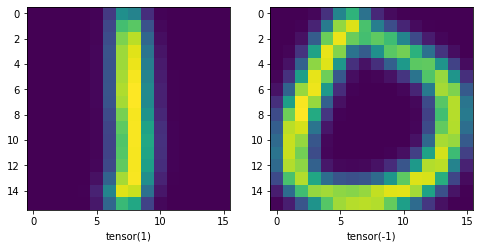

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
[ax[i].imshow(x_subset[i].reshape(16, -1)) for i in range(2)]
[ax[i].set_xlabel(str(y_subset[i])) for i in range(2)]
plt.show()

## Test set

In [8]:
y, x = [], []
with open('usps.test.txt') as f:
    l = f.readline()
    i = 0
    while l:
        res = l.split()
        assert len(res[1:]) == 256, f'line {i} does not have 256 values'
        y.append(int(res[0]))
        x.append(torch.tensor([float(x.split(':')[1]) for x in res[1:]]))
        
        l = f.readline()
        i += 1
        
x = torch.cat(x).reshape(-1, 256)
y = torch.tensor(y)

#sys.getsizeof(x.storage())
assert x.shape[0] == y.shape[0]
assert x.shape[1] == 256

mask = (y == 1) | (y == 2)
x_test_subset = x[mask, :]
y_test_subset = y[mask]
y_test_subset = ((y_test_subset - 1) * 2) - 1

In [9]:
# show subset shapes
x_test_subset.shape, y_test_subset.shape

(torch.Size([623, 256]), torch.Size([623]))

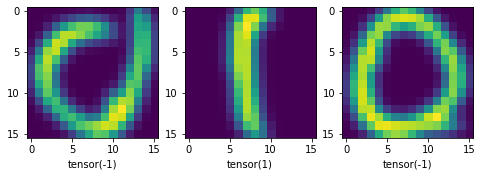

In [10]:
fig, ax = plt.subplots(ncols=3, figsize=(8, 4))
[ax[i].imshow(x_test_subset[i + 3].reshape(16, -1)) for i in range(3)]
[ax[i].set_xlabel(str(y_test_subset[i + 3])) for i in range(3)]
plt.show()

In [11]:
# take classes 1 and 2 ('0' and '1') and remove too similar vectors (norm of difference > threshold)

# the subset has to be normalized (?)

In [12]:
y_subset[:10]

tensor([ 1, -1,  1, -1,  1,  1, -1,  1,  1,  1])

In [13]:
for i in range(1, len(y_subset)):
    # check if current pattern is similar to the others before it
    d = x_subset[:i] / x_subset[i]
    d_var = d.var(axis=1)
    if d_var.min() < 1e-3:
        print(i, d_var.min())

In [14]:
d = (x_subset / x_subset[0])
d_var = d.var(axis=1)

In [15]:
d_var[1:].argmin()

tensor(1991)

In [16]:
d_var[1992]

tensor(0.0913)

In [17]:
# for this minimum, compute the kernel between those two patterns and see whether how much it approaches 1

In [33]:
d = {'x': x_subset, 'y': y_subset}
torch.save(d, 'usps_train.pt')

d = {'x': x_test_subset, 'y': y_test_subset}
torch.save(d, 'usps_test.pt')

In [34]:
d2 = torch.load('usps_train.pt')
d2

{'x': tensor([[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -0.9984,  ..., -0.9315, -0.9923, -0.9997],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         ...,
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
         [-1.0000, -0.9999, -0.9954,  ..., -0.9422, -0.9855, -0.9963],
         [-1.0000, -1.0000, -0.9999,  ..., -1.0000, -1.0000, -1.0000]]),
 'y': tensor([ 1, -1,  1,  ...,  1, -1,  1])}

In [35]:
d2 = torch.load('usps_test.pt')
d2

{'x': tensor([[-1.0000, -1.0000, -1.0000,  ..., -0.8582, -0.9798, -0.9983],
         [-1.0000, -1.0000, -0.9998,  ..., -0.9989, -1.0000, -1.0000],
         [-1.0000, -1.0000, -0.9999,  ..., -0.9642, -0.9981, -1.0000],
         ...,
         [-0.9997, -0.9952, -0.9734,  ..., -0.9975, -0.9998, -1.0000],
         [-0.9999, -0.9969, -0.9629,  ..., -0.9983, -0.9999, -1.0000],
         [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]),
 'y': tensor([-1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,
         -1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
         -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1,
         -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
         -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
         -1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1,  1, -

# Probe train a SVM classifier for several patterns

In [21]:
m, n = 15, x_subset.shape[1]
x_train, y_train = x_subset[:m], y_subset[:m]
print(f"m: {m}, n: {n}")

m: 15, n: 256


In [22]:
gamma_scale = 1 / (n * x_train.var())
gamma_auto = 1 / n
print(f"gamma_scale: {gamma_scale}, gamma_auto: {gamma_auto}")

gamma_scale: 0.011012367904186249, gamma_auto: 0.00390625


In [23]:
# use scikitlearn classifier
clf = svm.SVC(kernel='rbf', gamma=gamma_scale)
clf.fit(x_train, y_train)

res = clf.decision_function(x_train)
print(2*(res > 0) - 1)
print(y.numpy())

[ 1 -1  1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1]
[10  7  4 ...  5  1  2]


In [24]:
# example of computing an asymmetric RBF kernel
# let u be the x-es and t be the test
# basically for the polynomial kernel we would have computed < t, u.T >
u = torch.tensor([[-1, 2, 2, 1], [1, 3, -1, 3], [4, -1, 4, 1]])
t = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])

assert t.shape[1] == u.shape[1]

m, n = u.shape
p, n = t.shape
print(f"u: {m} x {n}, (m x n)")
print(f"t: {p} x {n}, (p x n)")
a = u.repeat(p, 1).reshape(p, m, n)
print(a)

u: 3 x 4, (m x n)
t: 2 x 4, (p x n)
tensor([[[-1,  2,  2,  1],
         [ 1,  3, -1,  3],
         [ 4, -1,  4,  1]],

        [[-1,  2,  2,  1],
         [ 1,  3, -1,  3],
         [ 4, -1,  4,  1]]])


In [25]:
b = t.repeat_interleave(m, axis=0).reshape(p, m, n)
print(b)

tensor([[[1, 2, 3, 4],
         [1, 2, 3, 4],
         [1, 2, 3, 4]],

        [[5, 6, 7, 8],
         [5, 6, 7, 8],
         [5, 6, 7, 8]]])


In [26]:
torch.norm((a - b).float(), dim=2)

tensor([[ 3.7417,  4.2426,  5.2915],
        [11.2250, 10.6771, 10.3923]])

In [27]:
def norm_diff_pairs(u, t):
    """    
    Generates all pairs between matrices of vectors U and V and subtracts them
    Dimensions: U (m x n), T (p x n)
    
    Will generate [[u1-t1, u2-t1 .. um-t1], .. [u1-tp, u2-tp .. um-tp]] (p x m)
    """
    assert u.shape[1] == t.shape[1], 'matrices have to have same number of colums (features)'
    m, n = u.shape
    p, n = t.shape
    
    a = u.repeat(p, 1).reshape(p, m, n)
    b = t.repeat_interleave(m, axis=0).reshape(p, m, n)
    return torch.norm((a - b).float(), dim=2)

In [28]:
norm_diff_pairs(u, t)

tensor([[ 3.7417,  4.2426,  5.2915],
        [11.2250, 10.6771, 10.3923]])

In [30]:
# now do the same with precomputed kernel
m, n = x_train.shape

gamma = gamma_scale
print(f"gamma: {gamma}")

kernel_train = torch.exp(- gamma * norm_diff_pairs(x_train, x_train) ** 2)
assert kernel_train.shape == (m, m)

svc = svm.SVC(kernel='precomputed', gamma=gamma)
svc.fit(kernel_train, y_train)

# visual comparison (identical)
print(svc.decision_function(kernel_train))
print(res)

gamma: 0.011012367904186249
[ 0.99984771 -0.99952101  0.99083516 -1.000125    1.08197294  1.06247191
 -1.00025255  0.68879462  0.99963269  1.04230669  1.03999591 -0.99945683
 -0.37714193 -1.000125   -1.07695517]
[ 0.99984768 -0.99952098  0.99083508 -1.00012495  1.08197276  1.06247184
 -1.00025258  0.68879438  0.99963266  1.04230656  1.03999578 -0.99945685
 -0.37714199 -1.00012498 -1.07695519]


In [31]:
# now compute the kernel for the test set
x_test, y_test = x_test_subset[:5], y_test_subset[:5]

kernel_test = torch.exp(- gamma * norm_diff_pairs(x_train, x_test) ** 2)

print(svc.decision_function(kernel_test))
print(y_test)

[-0.98220467 -1.03438949 -1.0308142  -0.77326538  0.76350906]
tensor([-1, -1, -1, -1,  1])


## Small callable example

In [32]:
class C:
    def __call__(self, *args, **kwargs):
        self.compute(*args, **kwargs)
        
    def compute(self, x):
        print(x)
        
c = C()
c(3)
c(x=4)

3
4


In [2]:
d = torch.load('KDDCup1999.pt')

In [3]:
d['x'].shape

torch.Size([290858, 120])